IMPORTING NECESSARY LIBRARIES

In [1]:
!pip install numpy opencv-python tensorflow scikit-learn matplotlib

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA PREPROCESSING AND LOADING

In [5]:
def load_images_from_folder(folder, img_size=(128, 128)):
    images = []
    labels = []
    label_dict = {}
    label_id = 0
    
    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)
        if os.path.isdir(subdir_path):
            # Assign label IDs
            if subdir not in label_dict:
                label_dict[subdir] = label_id
                label_id += 1
                
            for filename in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(label_dict[subdir])
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_dict

# Update this to your local dataset path
dataset_path = r'C:\Users\ashwi\Downloads\ds'
images, labels, label_dict = load_images_from_folder(dataset_path, img_size=(128, 128))

# Check the number of images and labels loaded
print(f"Number of images loaded: {len(images)}")
print(f"Number of labels loaded: {len(labels)}")
print(f"Label dictionary: {label_dict}")


Number of images loaded: 500
Number of labels loaded: 500
Label dictionary: {'Angelina Jolie': 0, 'Denzel Washington': 1, 'Megan Fox': 2, 'Robert Downey Jr': 3, 'Tom Cruise': 4}


In [9]:
img_height = 128  
img_width = 128   
batch_size = 32 
# Initialize ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Reserve 20% of the data for validation
)

# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data generator
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Create a separate generator for the test set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


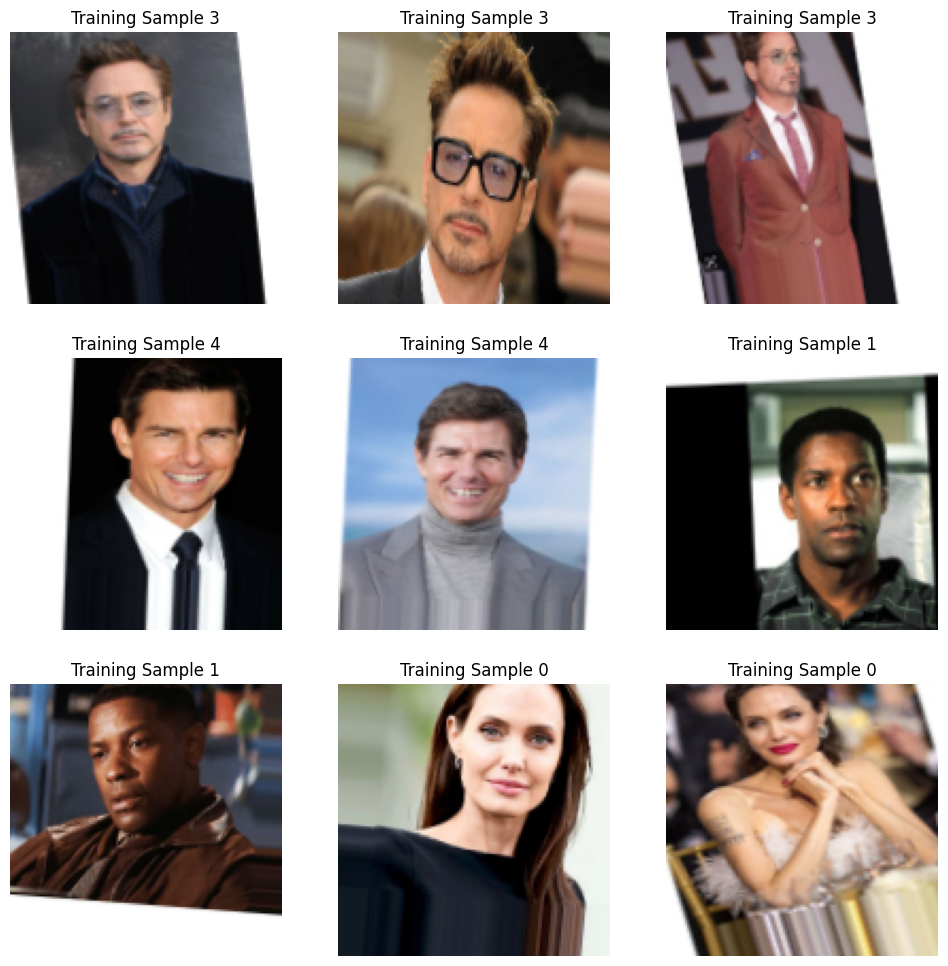

In [10]:
# Function to plot images from the dataset
def plot_sample_images(generator, title):
    images, labels = next(generator)
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"{title} {np.argmax(labels[i])}")
        plt.axis('off')
    plt.show()

# Plot samples from the training data
plot_sample_images(train_generator, "Training Sample")


CUSTOM CNN MODEL WITH DROPOUT

In [12]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_dict), activation='softmax')
])

model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model1.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32)

Epoch 1/10


c:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 704ms/step - accuracy: 0.1777 - loss: 1.6537 - val_accuracy: 0.2500 - val_loss: 1.6081
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 650ms/step - accuracy: 0.2159 - loss: 1.6072 - val_accuracy: 0.2500 - val_loss: 1.6020
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 597ms/step - accuracy: 0.2525 - loss: 1.6060 - val_accuracy: 0.2100 - val_loss: 1.6031
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 568ms/step - accuracy: 0.2613 - loss: 1.5700 - val_accuracy: 0.3100 - val_loss: 1.5060
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 708ms/step - accuracy: 0.3508 - loss: 1.4753 - val_accuracy: 0.3300 - val_loss: 1.4503
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 672ms/step - accuracy: 0.3486 - loss: 1.5065 - val_accuracy: 0.3700 - val_loss: 1.4201
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 598ms/step - accuracy: 0.3769 - loss: 1.3878 - val_accuracy: 0.3500 - val_loss: 1.4208
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 672ms/step - accuracy: 0.3836 - loss: 1.3471 - val_accuracy: 0.4100

CUSTOM CNN MODEL WITHOUT DROPOUT

In [15]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_dict), activation='softmax')
])

model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model2.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 731ms/step - accuracy: 0.2070 - loss: 1.6837 - val_accuracy: 0.2000 - val_loss: 1.6121
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 597ms/step - accuracy: 0.1673 - loss: 1.6050 - val_accuracy: 0.2900 - val_loss: 1.5764
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 633ms/step - accuracy: 0.2558 - loss: 1.5447 - val_accuracy: 0.3300 - val_loss: 1.5175
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 927ms/step - accuracy: 0.3464 - loss: 1.5013 - val_accuracy: 0.3100 - val_loss: 1.5460
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 642ms/step - accuracy: 0.3801 - loss: 1.4521 - val_accuracy: 0.3700 - val_loss: 1.4920
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 609ms/step - accuracy: 0.3483 - loss: 1.3944 - val_accuracy: 0.4600 - val_loss: 1.3872
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 572ms/step - accuracy: 0.4531 - loss: 1.3997 - val_accuracy: 0.4100 - val_loss: 1.3169
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 642ms/step - accuracy: 0.3754 - loss: 1.3725 - val_accur

COMPARISION OF RESULTS DROPOUT AND NO DROPOUT

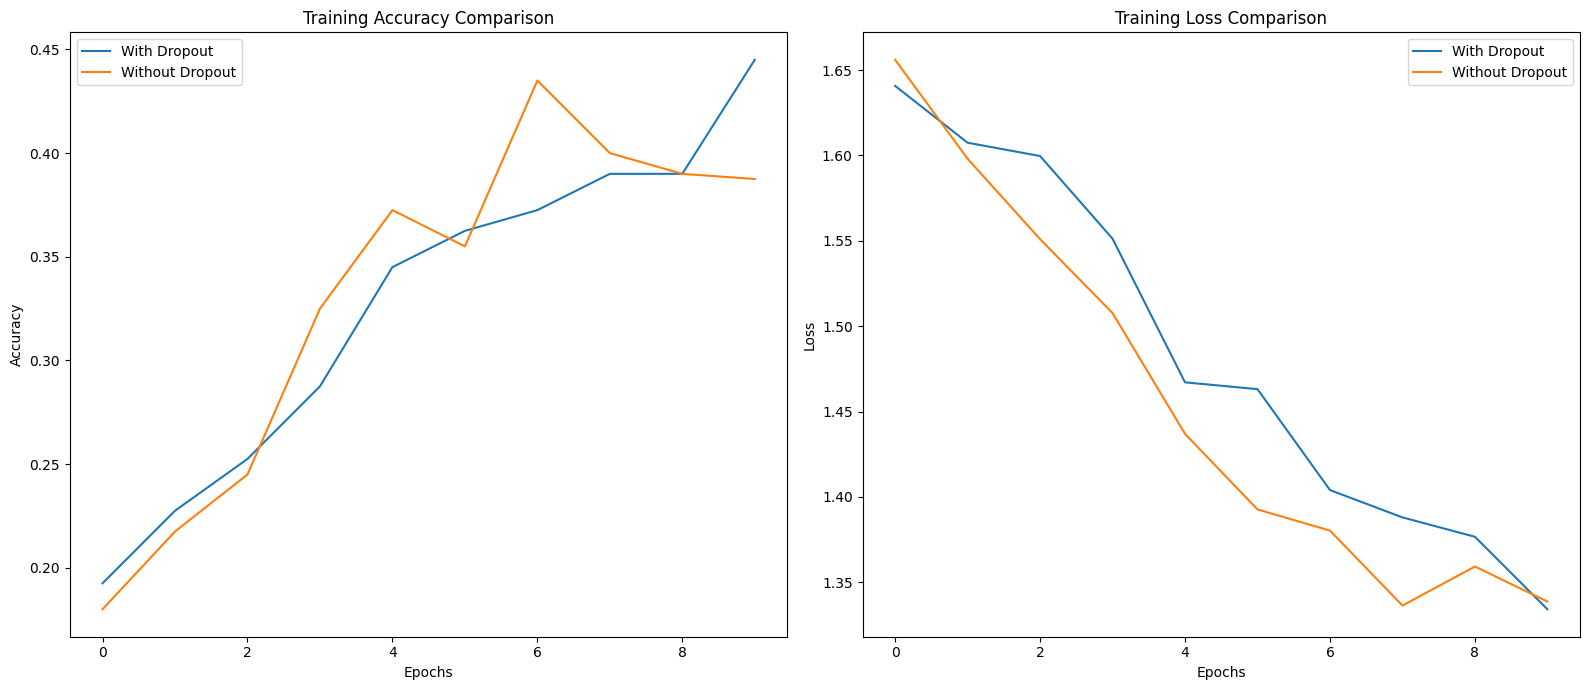

In [21]:
import matplotlib.pyplot as plt

# Extract training accuracy and loss from the model with dropout
acc_with_dropout = model1.history.history['accuracy']
loss_with_dropout = model1.history.history['loss']

# Extract training accuracy and loss from the model without dropout
acc_without_dropout = model2.history.history['accuracy']
loss_without_dropout = model2.history.history['loss']

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot training accuracy comparison
axes[0].plot(acc_with_dropout, label='With Dropout')
axes[0].plot(acc_without_dropout, label='Without Dropout')
axes[0].set_title('Training Accuracy Comparison')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot training loss comparison
axes[1].plot(loss_with_dropout, label='With Dropout')
axes[1].plot(loss_without_dropout, label='Without Dropout')
axes[1].set_title('Training Loss Comparison')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


TRAINING WITH DIFFERENT OPTIMIZERS

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad



optimizers = {
    'Adam': Adam(),
    'RMSprop': RMSprop(),
    'SGD': SGD(),
    'Adagrad': Adagrad()
}

# Store histories for plotting
histories = {}

for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_dict), activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model and store history
    history = model.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32, verbose=1)
    histories[name] = history.history


Training with Adam optimizer...
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 676ms/step - accuracy: 0.1979 - loss: 1.7441 - val_accuracy: 0.2000 - val_loss: 1.6102
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 567ms/step - accuracy: 0.2333 - loss: 1.6036 - val_accuracy: 0.2800 - val_loss: 1.5964
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 670ms/step - accuracy: 0.2928 - loss: 1.5914 - val_accuracy: 0.1700 - val_loss: 1.5940
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 721ms/step - accuracy: 0.2612 - loss: 1.5660 - val_accuracy: 0.2800 - val_loss: 1.5202
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 673ms/step - accuracy: 0.3078 - loss: 1.4849 - val_accuracy: 0.3800 - val_loss: 1.4881
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 714ms/step - accuracy: 0.2722 - loss: 1.5554 - val_accuracy: 0.3800 - val_loss: 1.5010
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 482ms/step - accuracy: 0.3416 - loss: 1.4470 - val_accuracy: 0.3200 - val_loss: 1.4814
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 579ms/step - accuracy: 0.

COMPARISION OF DIFFERENT OPTIMISERS

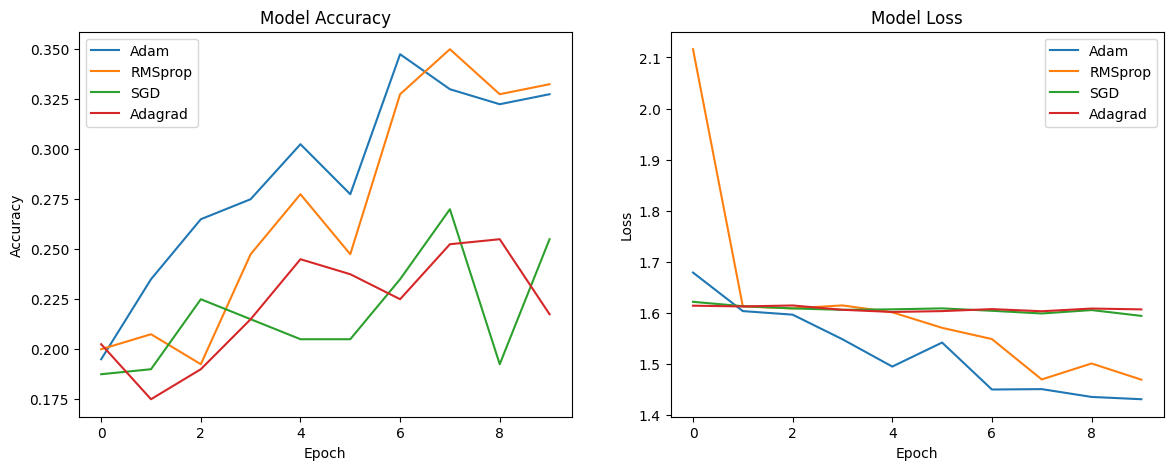

In [23]:
# Plot the results
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history['accuracy'], label=name)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
for name, history in histories.items():
    plt.plot(history['loss'], label=name)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

RESNET MODEL

In [24]:
import tensorflow as tf
resnet_model= Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,input_shape=(128,128,3),pooling='avg',weights='imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(len(label_dict), activation='softmax'))
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
resnet_model.fit(train_generator, validation_data=val_generator,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.2115 - loss: 1.6701 - val_accuracy: 0.2600 - val_loss: 1.6018
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.1862 - loss: 1.6195 - val_accuracy: 0.2800 - val_loss: 1.6281
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2203 - loss: 1.6236 - val_accuracy: 0.2200 - val_loss: 1.5965
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2518 - loss: 1.5956 - val_accuracy: 0.2900 - val_loss: 1.5694
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2725 - loss: 1.5732 - val_accuracy: 0.3000 - val_loss: 1.5795
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3407 - loss: 1.5543 - val_accuracy: 0.2500 - val_loss: 1.6374
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.2119 - loss: 1.6058 - val_accuracy: 0.3600 - val_loss: 1.5396
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.2952 - loss: 1.5739 - val_accuracy: 0.2800 - val_loss:

VGG 16 MODEL

In [26]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model= Sequential()
base_model= VGG16(weights="imagenet",include_top=False,input_shape=(128,128,3))
base_model.trainable=False
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(len(label_dict), activation='softmax'))
vgg_model.compile(optimizer='Adadelta',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
vgg_model.fit(train_generator, validation_data=val_generator,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.1713 - loss: 1.9388 - val_accuracy: 0.2300 - val_loss: 1.7778
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.1917 - loss: 1.8901 - val_accuracy: 0.2000 - val_loss: 1.7758
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.1929 - loss: 1.8064 - val_accuracy: 0.2100 - val_loss: 1.7338
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.1855 - loss: 1.7337 - val_accuracy: 0.2300 - val_loss: 1.6775
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.2475 - loss: 1.6917 - val_accuracy: 0.2400 - val_loss: 1.6642
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.2057 - loss: 1.7115 - val_accuracy: 0.2800 - val_loss: 1.6233
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 63s 5s/step - accuracy: 0.2462 - loss: 1.6874 - val_accuracy: 0.2400 - val_loss: 1.6378
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 63s 5s/step - accuracy: 0.2287 - loss: 1.6468 - val_accuracy: 0.3100 - val_loss:

INCEPTION V3 MODEL

In [28]:
from tensorflow.keras.applications import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

inceptionv3_model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_dict), activation='softmax')  
])

inceptionv3_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
inceptionv3_model.fit(train_generator, validation_data=val_generator,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2838 - loss: 11.4800 - val_accuracy: 0.3700 - val_loss: 6.0072
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 879ms/step - accuracy: 0.4028 - loss: 4.9682 - val_accuracy: 0.5100 - val_loss: 1.4034
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 859ms/step - accuracy: 0.4999 - loss: 1.8100 - val_accuracy: 0.5700 - val_loss: 1.0324
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 926ms/step - accuracy: 0.4810 - loss: 1.1663 - val_accuracy: 0.5200 - val_loss: 1.0291
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 884ms/step - accuracy: 0.4971 - loss: 1.1424 - val_accuracy: 0.6800 - val_loss: 0.8827
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 995ms/step - accuracy: 0.5704 - loss: 0.9784 - val_accuracy: 0.6400 - val_loss: 0.9017
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 991ms/step - accuracy: 0.5853 - loss: 0.9980 - val_accuracy: 0.5700 - val_loss: 0.9319
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 992ms/step - accuracy: 0.5418 - loss: 0.9909 - val_accura

COMPARISION AMONGST THREE VARIANTS OF CNN

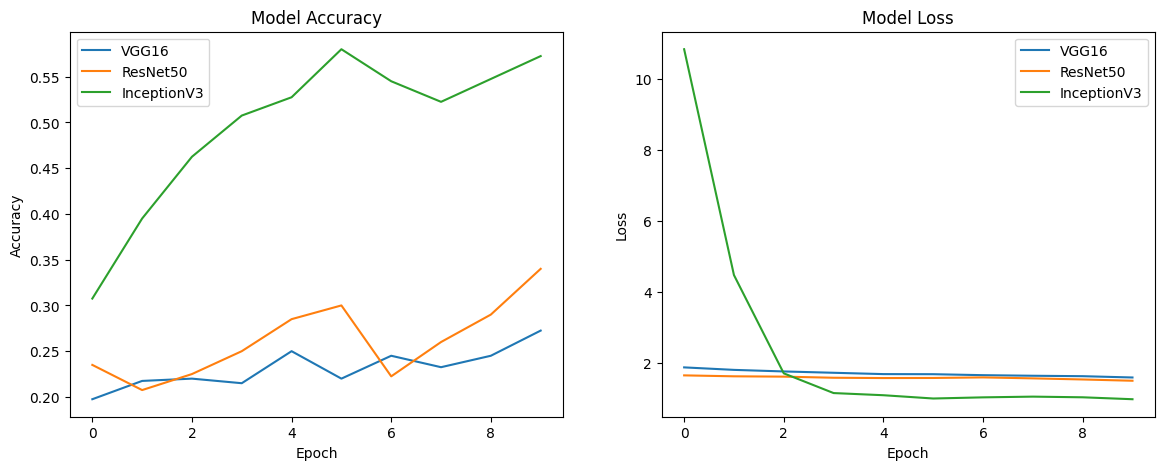

In [30]:
import matplotlib.pyplot as plt

# Example histories (replace these with your actual history objects)
histories = {
    'VGG16': vgg_model.history.history, 
    'ResNet50': resnet_model.history.history,  
    'InceptionV3': inceptionv3_model.history.history  
}

# Plot the results
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history['accuracy'], label=name)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
for name, history in histories.items():
    plt.plot(history['loss'], label=name)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


MAIN MODEL TRAINING USING CUSTOM INCEPTION V3 ARCHITECTURE

In [31]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
# Load the InceptionV3 model, excluding the top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers to retain pretrained features
base_model.trainable = False
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling to reduce dimensions
x = Dense(1024, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(5, activation='softmax')(x)  # Output layer for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a suitable optimizer and loss function
model.compile(optimizer=Adam(),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [32]:
# Train the model with the training and validation data generators
history = model.fit(
    train_generator,
    epochs=500,  # Adjust the number of epochs as needed
    validation_data=val_generator
)
from tensorflow.keras.models import save_model

# Assuming your trained model is stored in a variable called `model`
save_model(model, 'CNNmodel.h5')  # Save the model to an .h5 file


Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2669 - loss: 5.1081 - val_accuracy: 0.4000 - val_loss: 2.3934
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 909ms/step - accuracy: 0.3919 - loss: 2.0124 - val_accuracy: 0.5000 - val_loss: 1.3809
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 909ms/step - accuracy: 0.4835 - loss: 1.4035 - val_accuracy: 0.5500 - val_loss: 1.0215
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 910ms/step - accuracy: 0.5345 - loss: 1.2061 - val_accuracy: 0.4800 - val_loss: 1.0694
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 904ms/step - accuracy: 0.5397 - loss: 1.1580 - val_accuracy: 0.6100 - val_loss: 0.9038
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 928ms/step - accuracy: 0.5916 - loss: 0.9739 - val_accuracy: 0.5600 - val_loss: 0.9533
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 897ms/step - accuracy: 0.5805 - loss: 1.0196 - val_accuracy: 0.5700 - val_loss: 0.9851
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 982ms/step - accuracy: 0.5819 - loss: 1.0391 - val

MODEL EVALUATION

In [33]:
# Evaluate the fine-tuned model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")



c:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 683ms/step - accuracy: 0.8933 - loss: 0.2970
Test accuracy: 0.9240000247955322


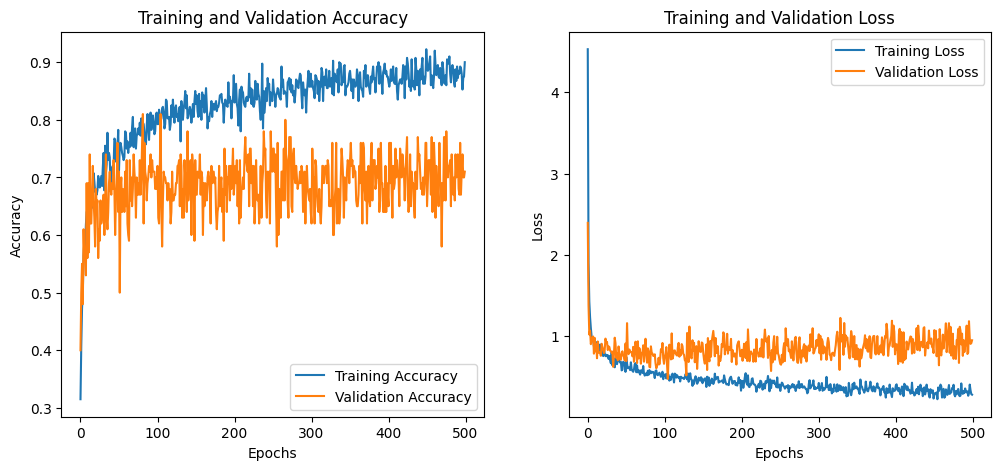

In [71]:
def plot_accuracy_and_loss(history):
    # Accuracy Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Example usage (replace 'history' with your actual history object)
plot_accuracy_and_loss(history)

LIME 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

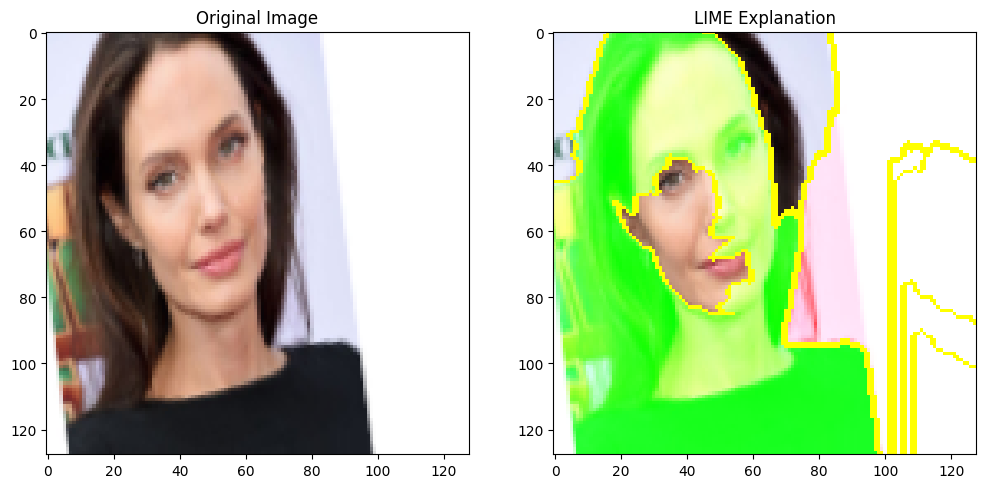

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Create a LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Get an image and label from the generator
image_batch, label_batch = next(val_generator)
image = image_batch[0]  # Extract the first image from the batch
label = np.argmax(label_batch[0])  # Get the true label for the first image

# Define a function for LIME to use that returns the model predictions
def predict_fn(images):
    images = np.array(images)
    return model.predict(images)

# Generate LIME explanation
explanation = explainer.explain_instance(
    image, 
    predict_fn, 
    top_labels=5, 
    hide_color=0, 
    num_samples=1000  # Number of perturbed samples used by LIME
)

# Get the explanation for the top label
lime_image, mask = explanation.get_image_and_mask(
    label,
    positive_only=False,
    num_features=10,
    hide_rest=False
)

# Plot the original image and the LIME explanation side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# LIME Explanation
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(lime_image, mask))
plt.title("LIME Explanation")

plt.show()


SHAP

c:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


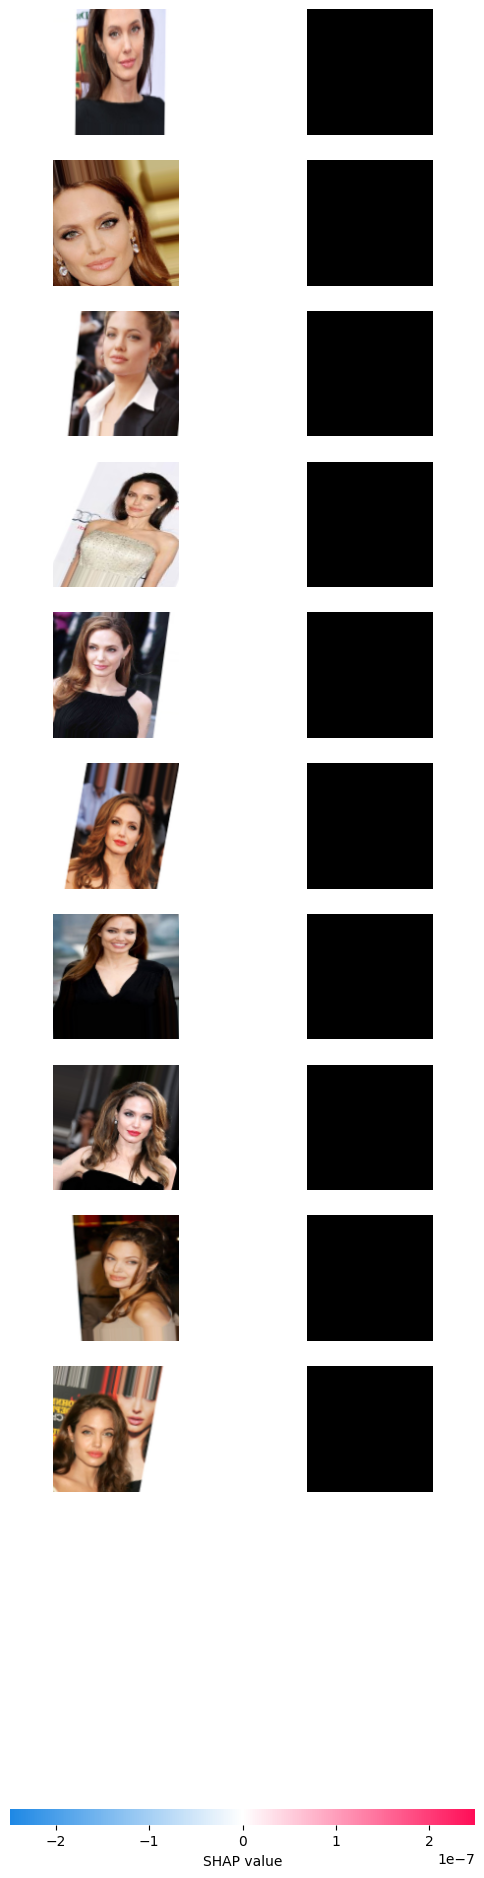

In [96]:
import shap
import numpy as np

# Extract a small subset from the train_generator and val_generator
# For instance, get the first batch of 100 samples from train_generator
X_train_batch, _ = next(train_generator)
X_val_batch, _ = next(val_generator)

# You might want to slice it to a smaller subset for performance
X_train_sample = X_train_batch[:100]
X_val_sample = X_val_batch[:10]

# Create a SHAP explainer
explainer = shap.DeepExplainer(model, X_train_sample)
shap_values = explainer.shap_values(X_val_sample)

# Plot the SHAP values for the first image and the first class
shap.image_plot(shap_values, X_val_sample)


SMOOTH GRAD

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


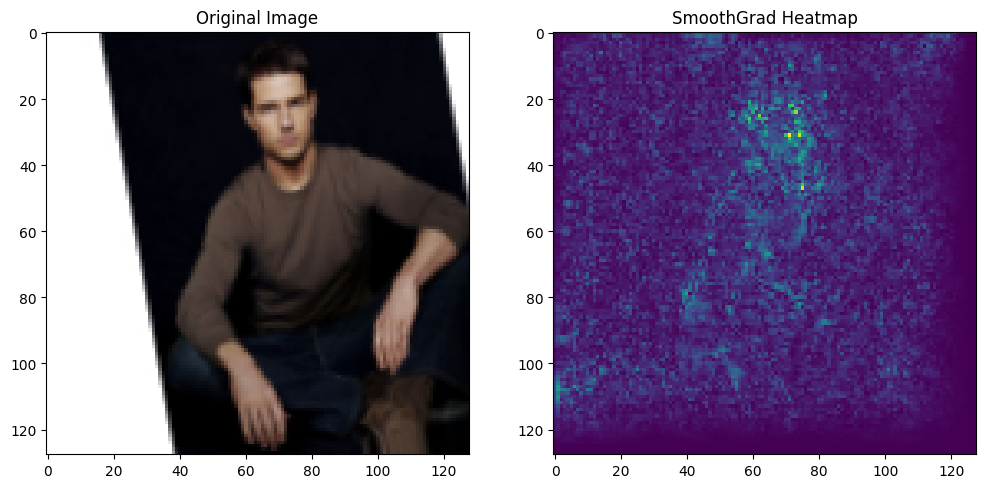

In [167]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to compute gradients
def compute_gradients(inputs, model, class_index):
    with tf.GradientTape() as tape:
        inputs = tf.cast(inputs, tf.float32)
        tape.watch(inputs)
        predictions = model(inputs)
        loss = predictions[:, class_index]
    return tape.gradient(loss, inputs)

# Function to compute SmoothGrad
def smoothgrad(inputs, model, class_index, num_samples=50, noise=0.1):
    inputs = np.array(inputs, dtype=np.float32)
    smoothgrad = np.zeros_like(inputs)
    for _ in range(num_samples):
        noise_added = inputs + np.random.normal(0, noise, inputs.shape)
        grad = compute_gradients(noise_added, model, class_index)
        smoothgrad += grad.numpy()
    smoothgrad /= num_samples
    return smoothgrad

# Extract a batch of images from the validation data generator
val_images, _ = next(val_generator)

# Choose an image from the validation set for explanation
test_image = val_images[2:3]  # Select the 15th image (adjust index as needed)

# Predict the class of the test image
predicted_class = np.argmax(model.predict(test_image))

# Compute SmoothGrad explanations
smoothgrad_result = smoothgrad(test_image, model, predicted_class)

# Plot the original image and the SmoothGrad heatmap side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_image[0])
plt.title("Original Image")

# SmoothGrad Heatmap
plt.subplot(1, 2, 2)
plt.imshow(np.abs(smoothgrad_result[0]).sum(axis=-1), cmap='viridis')
plt.title("SmoothGrad Heatmap")

plt.show()


OCCLUSION SENSITIVITY

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/s

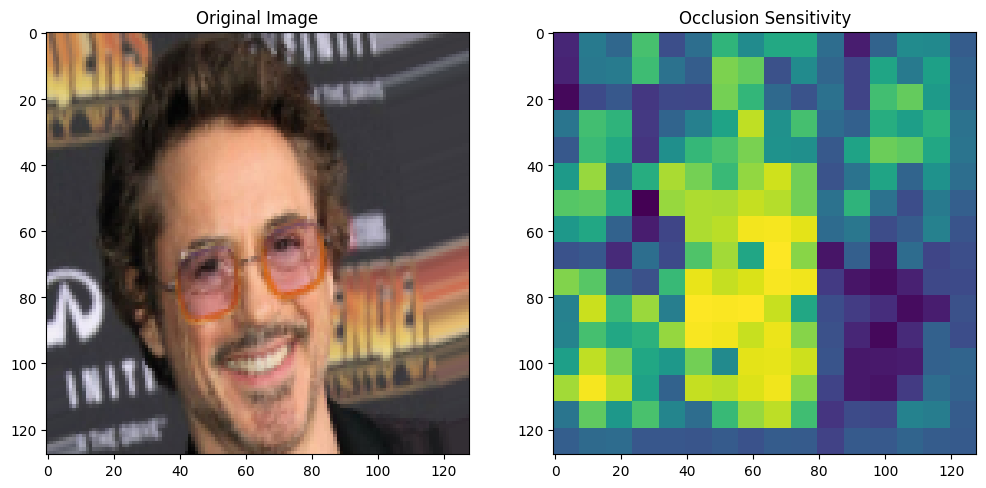

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Implement occlusion_sensitivity function to get occlusion explanations
def occlusion_sensitivity(model, image, label, patch_size=8):
    width, height, _ = image.shape
    heatmap = np.zeros((width, height))
    
    for i in range(0, width, patch_size):
        for j in range(0, height, patch_size):
            occluded_image = image.copy()
            occluded_image[i:i+patch_size, j:j+patch_size] = 0
            occluded_image = np.expand_dims(occluded_image, axis=0)
            
            prediction = model.predict(occluded_image)
            heatmap[i:i+patch_size, j:j+patch_size] = prediction[0][label]
    
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
    return heatmap

# Get an image and label from the generator
image_batch, label_batch = next(val_generator)
image = image_batch[12]  # Extract the first image from the batch
label = np.argmax(label_batch[0])  # Get the true label for the first image

# Compute Occlusion Sensitivity
occlusion_heatmap = occlusion_sensitivity(model, image, label)

# Plot the original image and the Occlusion Sensitivity heatmap side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# Occlusion Sensitivity Heatmap
plt.subplot(1, 2, 2)
plt.imshow(occlusion_heatmap, cmap='viridis')
plt.title("Occlusion Sensitivity")

plt.show()


SALIENCY MAPS

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Selected image min value: 0.0
Selected image max value: 1.0


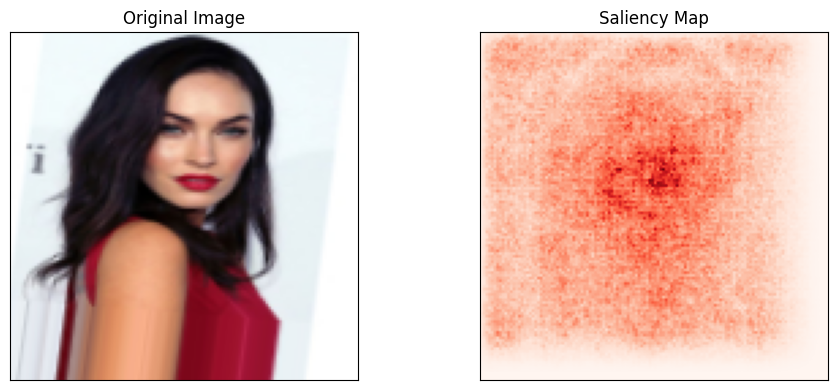

In [169]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tf_keras_vis.utils.scores import CategoricalScore
import matplotlib.pyplot as plt

# Get a batch of images from the validation generator
images_batch, labels_batch = next(val_generator)  # Replace 'val_gen' with your validation generator

# Pass the batch through the model to get predictions
predictions = model.predict(images_batch)

# Find the image with the highest confidence prediction
max_confidence_index = np.argmax(np.max(predictions, axis=1))
selected_image = images_batch[max_confidence_index].reshape((1,) + images_batch[max_confidence_index].shape)

# Check image data range
print("Selected image min value:", np.min(selected_image))
print("Selected image max value:", np.max(selected_image))

# Manually set the last layer's activation to linear, if necessary
model.layers[-1].activation = None
model.compile(optimizer=model.optimizer, loss=model.loss)  # Re-compile to apply changes

# Create a Saliency object
saliency = Saliency(model, clone=False)

# Use the predicted class with the highest confidence as the target score
predicted_class = np.argmax(predictions[max_confidence_index])
score = CategoricalScore([predicted_class])

# Generate saliency map
saliency_map = saliency(score, selected_image, smooth_samples=20, smooth_noise=0.2)
saliency_map = normalize(saliency_map)

# Plot the original image and the saliency map side by side
subplot_args = {
   'nrows': 1,
   'ncols': 2,  # Two columns for side-by-side comparison
   'figsize': (10, 4),
   'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subplot_args)

# Ensure the selected image is in [0, 1] range before displaying
selected_image_normalized = selected_image[0] / 255.0 if np.max(selected_image) > 1 else selected_image[0]
ax[0].imshow(selected_image_normalized)
ax[0].set_title('Original Image')

# Display the saliency map
ax[1].imshow(saliency_map[0], cmap='Reds')
ax[1].set_title('Saliency Map')

plt.tight_layout()
plt.show()


REAL DATA PREDICTTION

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


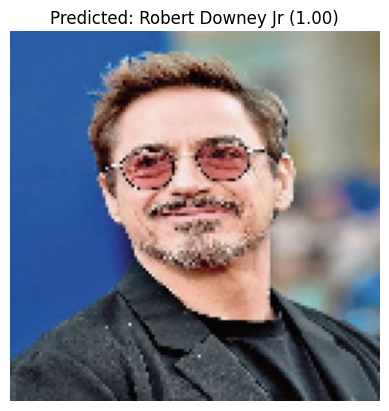

In [1]:
# Replace this dictionary with your actual label dictionary
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the model from the file
model = tf.keras.models.load_model('CNNmodel.h5')

# Now the model is loaded and can be used for predictions, evaluation, or further training

input_size = (128, 128)
label_dict = {
    0: 'Angelina Jolie',
    1: 'Denzel Washington',
    2: 'Megan Fox',
    3: 'Robert Downey Jr',
    4: 'Tom Cruise'
}

def preprocess_image(img_path):
    # Load the image with target size 128x128
    img = image.load_img(img_path, target_size=input_size)
    # Convert the image to an array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image (as the model was likely trained with normalized images)
    img_array = img_array / 255.0
    return img_array
def classify_image(img_path):
    # Preprocess the image
    img_array = preprocess_image(img_path)
    # Get predictions from the model
    predictions = model.predict(img_array)
    # Get the index of the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]
    # Get the label corresponding to the predicted class
    predicted_label = label_dict[predicted_class]
    return predicted_label, predictions[0][predicted_class]
def show_and_classify(img_path):
    # Classify the image
    label, confidence = classify_image(img_path)
    
    # Load and display the image
    img = image.load_img(img_path, target_size=input_size)
    plt.imshow(img)
    plt.title(f'Predicted: {label} ({confidence:.2f})')
    plt.axis('off')
    plt.show()

# Example usage:
img_path = r'C:\Users\ashwi\Downloads\Robert_Downey_Jr._29.webp'  # Replace with the path to the image you want to classify
show_and_classify(img_path)

